In [3]:
import os
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
#dataset_path='/wclustre/novapro/R19-11-18-Prod5_fullset/mbaird42-trimmed-H5s-for-CVN-training/FD_nominal/FHC_nonswap/'
dataset_path='/wclustre/nova/users/rafaelma2/NOvA-Clean/datos/procesados/dataset/'
files=os.listdir(dataset_path)
files = [dataset_path+f for f in files]
#files=files[0:2]

In [ ]:
# numero de eventos
# numero de particulas
# numero de piones
# distribucion de numero de hits de piones 
# distribucion de cantidad de particulas
#distribucion de cantidad de piones
# distribucion de catidad de piones 

In [5]:
def load_nova(filelist):
    
    for filename in tqdm(filelist):
        with h5py.File(filename, 'r') as h5_file;
        
            labels = h5_file['label']
            energies = h5_file['energy']
            cvn_maps = h5_file['cvnmap']
            cvn_obj_maps = h5_file['cvnobjmap']
            cvn_lab_maps = h5_file['cvnlabmap']
            
            
            
            
            
load_nova(files)

SyntaxError: invalid syntax (1187995843.py, line 4)

In [66]:
def count_events(filelist):
    sumador=0
    for filename in tqdm(filelist):
        
        with h5py.File(filename, 'r') as h5_file:
        
            sumador+=len(h5_file['label'])
            
    print(sumador)
            
#count_events(files)

def count_particles(filelist):
    sumador=0
    for filename in tqdm(filelist):
        
        with h5py.File(filename, 'r') as h5_file:
            
            sumador+=np.sum(np.max(cvn_obj_maps[:], axis=1))
            
    print(sumador)
            
count_particles(files)

100%|█████████████████████████████████████████████████████████| 1594/1594 [00:00<00:00, 1601.28it/s]

400094.0


In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def count_unique_classes(masked_cvn_obj_maps):
    return np.count_nonzero(np.unique(masked_cvn_obj_maps) != 0)

def dist_num_class_in_events(filelist,id_class):
    num_class_in_events = []
    
    for filename in tqdm(filelist):
        try:
            with h5py.File(filename, 'r') as h5_file:
                cvn_obj_maps = h5_file['cvnobjmap'][:]
                cvn_lab_maps = h5_file['cvnlabmap'][:]
                masked_cvn_obj_maps = np.where(np.isin(cvn_lab_maps, [id_class]), cvn_obj_maps, 0)
                num_classes = np.apply_along_axis(count_unique_classes, 1, masked_cvn_obj_maps)
                num_class_in_events.extend(num_classes)
                
        except Exception as e:
            print(f"Error al procesar el archivo {filename}: {e}")
    
    return num_class_in_events





100%|███████████████████████████████████████████████████████████| 1594/1594 [00:26<00:00, 60.42it/s]


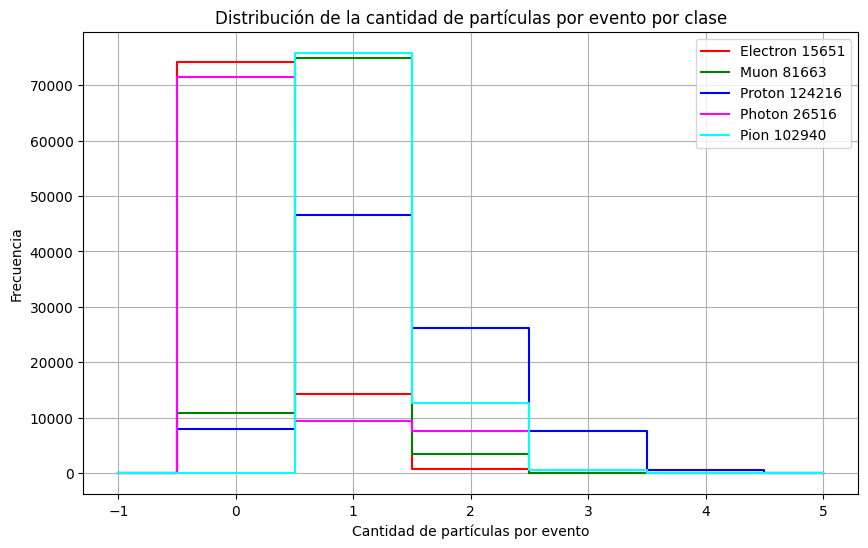

In [9]:
colors = ["red", "green", "blue", "magenta", "cyan"]
# Lista de nombres de las clases
class_names = ['Electron', 'Muon', 'Proton', 'Photon', 'Pion']
class_ids = [1,2,3,7,5]

# Genera visualización combinada para todas las clases
plt.figure(figsize=(10, 6))

for class_name, color,class_id in zip(class_names, colors,class_ids):
    num_class_in_events = dist_num_class_in_events(files, id_class=class_id)
    
    hist, bins = np.histogram(num_class_in_events, bins=[-1, 0, 1, 2, 3, 4, 5, 6])
    plt.step(bins[:-1], hist, where='mid',linestyle='solid', label=class_name+' '+str(np.sum(num_class_in_events)), color=color)
    # Histograma de distribución de cantidad de partículas por evento
    #plt.hist(num_class_in_events, bins=range(max(num_class_in_events) + 2), histtype='step', stacked=True, fill=False, linewidth=2, label=class_name, color=color)

plt.title('Distribución de la cantidad de partículas por evento por clase')
plt.xlabel('Cantidad de partículas por evento')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()